### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Data Transformation

- Creating new features from existing features
- Trimming Columns
- Handling ordinal and nominal categorical features
- Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
%%time
new_df = pd.read_hdf('../data/interim/Info_UserData_Info_Content.h5', key='user')

Wall time: 400 ms


In [99]:
new_df.head()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,points,...,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc
0,12,7.0,89.800000,1.600000,0.500000,3.0,0.0,1.0,1,9533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,0.0,74.250000,1.500000,3.250000,4.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,1.0,24.571429,1.428571,3.142857,6.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8,3.0,37.750000,1.125000,1.875000,5.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,26,15.0,14.923077,1.500000,0.423077,11.0,0.0,1.0,1,73838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
new_df.columns

Index(['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt',
       'used_hint_cnt', 'is_hint_used', 'is_downgrade', 'is_upgrade', 'level',
       'points', 'badges_cnt', 'user_grade', 'has_teacher_cnt',
       'is_self_coach', 'has_student_cnt', 'belongs_to_class_cnt',
       'has_class_cnt', 'date_count', 'difficulty', 'learning_stage',
       'user_city_chc', 'user_city_cy', 'user_city_hc', 'user_city_hlc',
       'user_city_ilc', 'user_city_kh', 'user_city_kl', 'user_city_km',
       'user_city_lj', 'user_city_ml', 'user_city_ntct', 'user_city_ntpc',
       'user_city_phc', 'user_city_ptc', 'user_city_tc', 'user_city_tn',
       'user_city_tp', 'user_city_ttct', 'user_city_ty', 'user_city_ylc'],
      dtype='object')

## Splitting Train Set and Test Set

In [198]:
from sklearn.model_selection import train_test_split

X = new_df.drop('level', axis=1)
y = new_df['level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

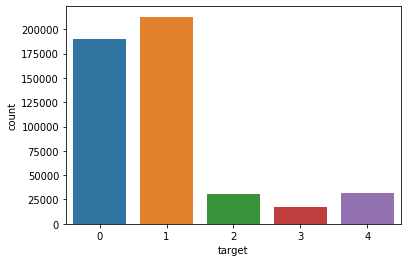

In [199]:
df = pd.DataFrame(X)
df['target'] = y
sns.countplot('target', data=df)

In [200]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X, y = rus.fit_sample(X, y)

#plot_2d_space(X_rus, y_rus, 'Random under-sampling')

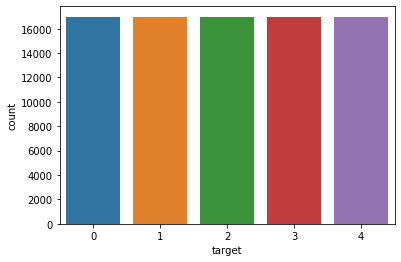

In [201]:
df = pd.DataFrame(X)
df['target'] = y
sns.countplot('target', data=df)

In [202]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['problem_number', 'is_correct', 'is_upgrade', 'is_self_coach', 'target']
[6.73360728e-02 1.06317314e-01 7.18603295e-03 1.21388134e-02
 1.62245017e-02 1.05036885e-02 2.09311424e-03 2.17224820e-01
 1.33030687e-02 8.57568607e-03 3.52137434e-03 2.43781599e-03
 5.04177719e-02 6.55377545e-04 2.29363891e-03 9.56970750e-04
 2.47535527e-03 1.27786525e-03 2.52852734e-03 3.97631856e-04
 3.12869206e-04 5.46233966e-04 2.84522222e-04 1.69958058e-04
 3.83187848e-04 3.75136445e-04 1.91590444e-04 1.41077981e-06
 3.14186287e-04 2.72105476e-04 6.72050336e-04 3.80316755e-05
 2.94981953e-04 6.21710107e-04 4.57971025e-04 7.61717247e-04
 2.45919704e-04 7.14982574e-04 3.53725833e-04 4.65122267e-01]


### Correlation with the Target

In [203]:
X.corr()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,points,badges_cnt,...,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc,target
problem_number,1.000000,0.903894,-0.033669,0.068837,0.110518,0.712669,0.255876,0.344064,0.103691,0.159178,...,-0.004278,0.000565,0.023365,-0.014559,0.007865,-0.018170,0.033759,-0.010073,-0.007878,0.373853
is_correct,0.903894,1.000000,-0.087946,-0.049052,-0.099401,0.393978,0.165547,0.442069,0.110159,0.120063,...,0.013852,-0.003999,0.008511,-0.013823,0.008064,-0.005888,0.015540,-0.011354,-0.004239,0.468539
total_sec_taken,-0.033669,-0.087946,1.000000,0.169754,0.229255,0.074730,0.023200,-0.140110,-0.017909,0.002346,...,-0.002912,0.015389,-0.007093,0.028318,0.001670,-0.006993,0.001730,-0.006062,-0.013689,-0.163599
total_attempt_cnt,0.068837,-0.049052,0.169754,1.000000,0.500801,0.245069,0.064170,-0.148162,-0.011224,0.048542,...,-0.020726,0.003321,0.017532,0.019733,-0.003096,-0.043133,0.016546,0.017335,0.000232,-0.169769
used_hint_cnt,0.110518,-0.099401,0.229255,0.500801,1.000000,0.441555,0.104117,-0.281633,-0.052366,0.041240,...,-0.029587,0.006750,0.018505,0.026783,0.009615,-0.051996,0.019500,0.039398,-0.010791,-0.312686
is_hint_used,0.712669,0.393978,0.074730,0.245069,0.441555,1.000000,0.305181,0.057754,0.046691,0.161037,...,-0.026615,0.008047,0.025111,-0.007153,0.002580,-0.036604,0.058152,-0.003684,-0.013615,0.015065
is_downgrade,0.255876,0.165547,0.023200,0.064170,0.104117,0.305181,1.000000,0.232525,0.063745,0.082604,...,-0.003605,0.003793,0.007577,-0.004154,0.007727,-0.013394,0.047433,-0.011501,0.001245,0.118483
is_upgrade,0.344064,0.442069,-0.140110,-0.148162,-0.281633,0.057754,0.232525,1.000000,0.289377,0.186252,...,0.055525,-0.007963,-0.015714,-0.032489,0.000352,0.033278,0.003462,-0.043694,0.025227,0.891908
points,0.103691,0.110159,-0.017909,-0.011224,-0.052366,0.046691,0.063745,0.289377,1.000000,0.777793,...,0.032704,-0.025124,-0.044612,-0.048942,0.002176,0.001574,0.031399,-0.039251,-0.015606,0.284582
badges_cnt,0.159178,0.120063,0.002346,0.048542,0.041240,0.161037,0.082604,0.186252,0.777793,1.000000,...,-0.035697,-0.022760,-0.028915,-0.032662,0.014436,-0.021768,0.057564,-0.014168,-0.050790,0.169954


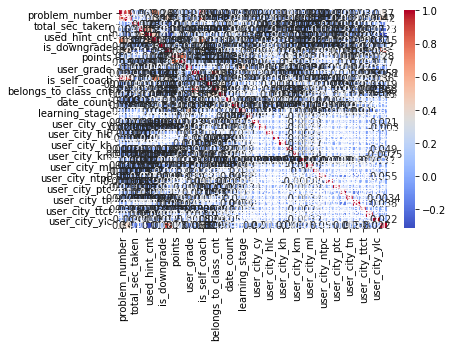

In [204]:
import seaborn as sns
sns.heatmap(X.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [205]:
corr_matrix=X.corr().abs()

upperMatrix = corr_matrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
corrFutures = [column for column in upperMatrix.columns if any(upperMatrix[column] > 0.90)]

corrFutures
X.drop(columns=corrFutures)

,problem_number,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,points,badges_cnt,user_grade,...,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc,target
0,8,153.750000,5.375000,0.750000,3.0,0.0,0.0,339019,74,7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,23,123.086957,1.739130,1.565217,12.0,0.0,0.0,21270,5,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,5,63.000000,1.000000,0.000000,0.0,0.0,0.0,48940,9,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,78.666667,1.000000,0.000000,0.0,0.0,0.0,170130,14,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,7.000000,1.000000,0.000000,0.0,0.0,0.0,27201,6,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84915,17,7.823529,1.000000,0.000000,0.0,0.0,4.0,202752,21,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
84916,10,17.857143,1.000000,0.000000,0.0,0.0,2.0,1073209,34,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
84917,17,11.058824,1.588235,0.294118,3.0,0.0,4.0,434859,35,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
84918,14,25.230769,1.384615,0.153846,1.0,0.0,3.0,305458,53,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [207]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection

### Amount of Variation

In [208]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.5)
X_train = sel.fit_transform(X_train)
X_test = sel.transform(X_test)

In [209]:
X_train.shape

(67936, 40)

### PCA

Text(0, 0.5, 'Cumulative explained variance')

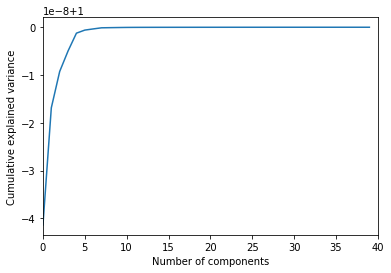

In [210]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,40,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [211]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [212]:
X_train.shape

(67936, 31)

## Data Modeling

In [213]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [214]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [215]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3271   62    5    3    0]
 [ 106 3091  132    9    1]
 [  21  261 2868  298   20]
 [   5   36  577 2441  349]
 [   6    3   96  674 2649]]


0.8431464908148846

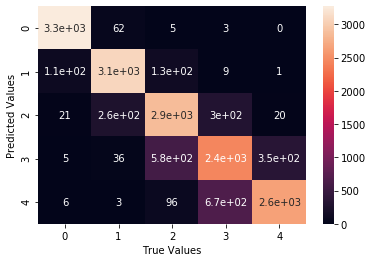

In [216]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
ax.set(xlabel='True Values', ylabel='Predicted Values')
plt.show()

#### KNN

In [116]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [118]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3222  108    9    1    1]
 [ 112 3068  142   15    2]
 [   6  208 2876  361   17]
 [   2   28  581 2391  406]
 [   0    6  104  614 2704]]


0.8396726330664155

SVM

In [119]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [120]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [121]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3341    0    0    0    0]
 [   0 3335    4    0    0]
 [   0    9 3329  127    3]
 [   0    2  385 2924   97]
 [   0    0   10  680 2738]]


0.9224564295807819

# XGboost

In [86]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3257   77    3    2    2]
 [  38 3163  129    7    2]
 [   2  102 3091  264    9]
 [   1    5  202 3024  176]
 [   0    0    9  228 3191]]


0.9259302873292511